# Introduction
The sinking of Titanic is one of the most notorious shipwredcks in the history.In 1912, during her voyage, the titanc sank after colliding with an iceberg, killing 1502 of 2224 passengers and crew.

<font color = 'blue'>

Content: 

1. [Load and Check Data](#1) 
    
2. [Variable Description](#2) 
    * [Univariate Variable Analysis](#3)
        * [Categorical Variable](#4)
        * [Numerical Variable](#5)
        

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

# seaborn-whitegrid uses style
plt.style.use('seaborn-v0_8-whitegrid')

import seaborn as sns

from collections import Counter

import warnings 
warnings.filterwarnings('ignore')


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


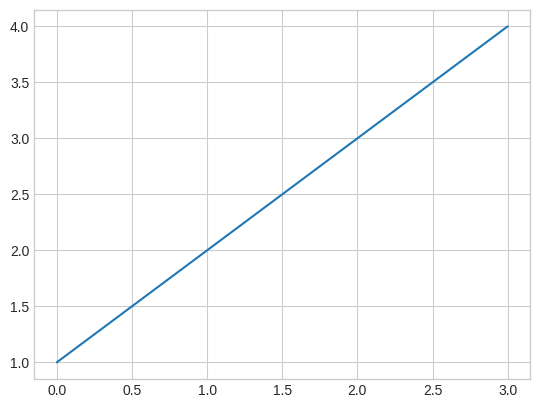

In [3]:
a = [1,2,3,4]
plt.plot(a)
plt.show()

<a id= '1'></a> 
   
# Load and Check Data

In [4]:
train_df = pd.read_csv("../../data/titanic_train.csv")
test_df = pd.read_csv("../../data/titanic_test.csv")
test_PassengerId = test_df['PassengerId']

In [5]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id= '2'></a> 
   
# Variable Description

1. PassengerId --> unique id number to each passenger 
1. Survived --> passenger survive(1) or died(0)
1. Pclass --> passenger class 
1. Name -- > name 
1. Sex --> gender of passenger
1. Age --> age of passenger
1. SibSp --> number of siblings/spouses
1. Parch --> number of parents/children 
1. Ticket --> ticket number
1. Fare --> amount of money spent of ticket
1. Cabin --> cabin category
1. Embarked --> port where passenger embarked (C = Cherbourg,Q = Queenstown, S = Southampton)

survived = 0 --> ölü

pclass --> yolcuların sınıfları

SibSp:

sib --> siblings --> kardeşler 

sp --> spouses --> karı-koca

Parch:

par --> parnet --> ebeveynler

ch --> children --> çocuklar

Fare --> ücret

Cabin --> Gemi içinde kalınan oda numarası

Embarked --> Gemiye hangi limandan binildiği

<a id= '3'></a> 

# Univariate Variable Analysis

    * Categorical Variable : Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp and Parch
    * Numerical Variable : Fare, age and passengerid

<a id= '4'></a> 

## Categorical Variable

In [9]:
def ba_plot(variable):
    
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """

    # var --> cinsiyetleri içerisinde bulunduran bir değişken.
    var = train_df[variable]

    # varValue --> cinsiyetten kaç tane olması gerektiğini sayar.
    varValue = var.value_counts()

    # görselleştirme
    plt.figure(figsize = (9,3))
    plt.bar()

<img src="../../img/variable.png" width="750" height="300">  

<a id= '5'></a> 

## Numerical Variable